In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
from keras.utils.vis_utils import plot_model

2022-12-12 20:51:11.473736: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 20:51:11.579613: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-12 20:51:11.960938: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/lib/:/usr/lib/x86_64-linux-gnu//usr/local/cuda/lib64/:/usr/local/cuda-11.7/lib64/::/usr/lib/:/usr/lib/x86_64-linux-gnu//usr/local/cuda/lib64/:/usr/local/cuda-11.7/lib64/:
2022-12-12 20:51:11.960984: W tenso

In [2]:
# tf.config.list_physical_devices('GPU')

In [3]:
transactions = pd.read_csv("data/transactions_train.csv")
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [4]:
articles = pd.read_csv("data/articles.csv")
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [5]:
# customer_0 = transactions.iloc[0]['customer_id']
# article_ids = transactions.loc[transactions['customer_id'] == customer_0]['article_id'].to_numpy()

# columns = ['product_type_name','product_type_no','product_group_name','colour_group_code', 'colour_group_name']

# articles.loc[articles['article_id'].isin(article_ids)].loc[:,columns]

In [6]:
unique_types = np.unique(articles['product_type_no'].to_numpy())
print(unique_types)
print(f"# of unique types: {len(unique_types)}")

[ -1  49  57  59  60  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  98 100 102 144 155 156 161 196 230 231 245 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 267 268 270 271 272 273 274 275 276 277 283
 284 285 286 287 288 289 291 293 295 296 297 298 299 300 302 303 304 305
 306 307 308 326 349 351 366 389 464 465 467 468 470 475 476 477 483 489
 491 492 493 494 495 496 498 499 503 504 508 509 510 511 512 514 515 521
 523 525 529 532 761 762]
# of unique types: 132


In [7]:
unique_colors = np.unique(articles['colour_group_code'].to_numpy())
print(unique_colors)
print(f"# of unique colors: {len(unique_colors)}")

[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 19 20 21 22 23 30 31
 32 33 40 41 42 43 50 51 52 53 60 61 62 63 70 71 72 73 80 81 82 83 90 91
 92 93]
# of unique colors: 50


In [8]:
type_dict = {}
for idx, val in enumerate(unique_types):
    type_dict[val] = idx
    
color_dict = {}
for idx, val in enumerate(unique_colors):
    color_dict[val] = idx

In [9]:
from typing import Tuple, List

In [10]:
def get_feature_vector_for_user(userid:int, type_dict:dict, color_dict:dict) -> List[Tuple[np.ndarray,np.ndarray]]:
    article_ids = transactions.loc[transactions['customer_id'] == userid]['article_id'].to_numpy()
    
    columns = ['product_type_no','colour_group_code']
    user_purchases = articles.loc[articles['article_id'].isin(article_ids)].loc[:,columns]
    
    feature_vector = []
    for idx, purchase in user_purchases.iterrows():
        type_onehot  = type_dict[purchase['product_type_no']]
        color_onehot = color_dict[purchase['colour_group_code']]
        
        feature  = np.zeros(len(type_dict)+len(color_dict))
        feature[type_onehot] = 1.0
        feature[color_onehot+len(type_dict)] = 1.0
        
        feature_vector.append(feature)
        
    feature_vector = np.stack(feature_vector)
    return feature_vector
#     print(feature_vector)

In [11]:
# print(get_feature_vector_for_user(customer_0, type_dict, color_dict))

In [12]:
unique_users = np.unique(transactions['customer_id'].to_numpy())

In [13]:
from tqdm import tqdm

In [14]:
# N = 200
# all_user_feature_vectors = []
# training_users = np.random.choice(unique_users.shape[0], N, replace=False)
# for user in tqdm(unique_users[training_users]):
#     feature_vector = get_feature_vector_for_user(user, type_dict, color_dict)
#     all_user_feature_vectors.append(feature_vector)

In [15]:
def get_model(input_width:int, output_width:int, lr:float=0.01, model_name:str="color") -> tf.keras.Model:
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(input_width, activation='relu', input_shape=(input_width,)),
        tf.keras.layers.Dense(2*input_width, activation='relu'),
        tf.keras.layers.Dense(2*input_width, activation='relu'),
        tf.keras.layers.Dense(output_width, activation='softmax'),
    ])
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
        loss='categorical_crossentropy',
        metrics=['acc']
    )
    plot_model(model, to_file=model_name, show_shapes=True, show_layer_names=True)
    return model

In [16]:
def get_data_permutations(all_user_feature_vectors) -> Tuple[np.ndarray,np.ndarray]:
    inputs  = []
    outputs = []
    for user in all_user_feature_vectors:
        if len(user) < 3:
            continue
        for i, input_feature in enumerate(user[:-1]):
            for j, output_feature in enumerate(user):
                if i == j:
                    continue
                inputs.append(np.concatenate([input_feature,user[i+1]]))
                outputs.append(output_feature)
    inputs = np.stack(inputs)
    outputs = np.stack(outputs)
    return inputs, outputs

In [17]:
# inputs, outputs = get_data_permutations(all_user_feature_vectors)
# print(np.shape(inputs))
# print(np.shape(outputs))

In [18]:
epochs     = 10
lr         = 0.05
batch_size = 32

In [19]:
color_model = get_model(input_width=2*(len(unique_types)+len(unique_colors)), output_width=len(unique_colors), lr=lr, model_name="color.png")
type_model  = get_model(input_width=2*(len(unique_types)+len(unique_colors)), output_width=len(unique_types),  lr=lr, model_name="type.png")

2022-12-12 20:51:47.630557: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 20:51:47.655565: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 20:51:47.655720: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 20:51:47.656109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [20]:
color_model.summary()
type_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 364)               132860    
                                                                 
 dense_1 (Dense)             (None, 728)               265720    
                                                                 
 dense_2 (Dense)             (None, 728)               530712    
                                                                 
 dense_3 (Dense)             (None, 50)                36450     
                                                                 
Total params: 965,742
Trainable params: 965,742
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)            

In [21]:
color_model.load_weights('weights/color/color_prediction.weights')
type_model.load_weights('weights/type/type_prediction.weights')

In [22]:
# np.shape(outputs[:,len(unique_types):])

In [23]:
# color_model.fit(inputs,outputs[:,len(unique_types):],epochs=epochs,batch_size=batch_size)

In [24]:
# np.shape(outputs[:,:len(unique_types)])

In [25]:
# history = type_model.fit(inputs,outputs[:,:len(unique_types)],epochs=epochs)

In [26]:
import matplotlib.pyplot as plt

In [27]:
# plt.plot(history.history['loss'], label = 'training_loss')
# plt.plot(history.history['acc'], label = 'training_accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()

In [28]:
# type_model.save_weights('weights/type/type_prediction.weights')
# color_model.save_weights('weights/color/color_prediction.weights')

In [29]:
N = 50
test_user_feature_vectors = []
testing_users = np.random.choice(unique_users.shape[0], N, replace=False)
for user in tqdm(unique_users[testing_users]):
    feature_vector = get_feature_vector_for_user(user, type_dict, color_dict)
    test_user_feature_vectors.append(feature_vector)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:00<00:00,  1.22s/it]


In [30]:
test_inputs, test_outputs = get_data_permutations(test_user_feature_vectors)

In [31]:
# print(np.shape(test_inputs))

In [32]:
predicted_colors = color_model.predict(test_inputs)
predicted_types  = type_model.predict(test_inputs)

 159/2049 [=>............................] - ETA: 1s

2022-12-12 20:52:50.568840: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2049/2049 [==============================] - 1s 614us/step


In [33]:
colors_predicted = np.argmax(predicted_colors,axis=-1)
colors_actual = np.argmax(test_outputs[:,len(unique_types):],axis=-1)

_, false_true = np.unique(colors_predicted==colors_actual,return_counts=True)

accuracy = false_true[-1] / len(test_outputs)
print(f"color accuracy: {round(accuracy,4)*100}%")

color accuracy: 31.119999999999997%


In [34]:
types_predicted = np.argmax(predicted_types,axis=-1)
types_actual = np.argmax(test_outputs[:,:len(unique_types)],axis=-1)

_, false_true = np.unique(types_predicted==types_actual,return_counts=True)

accuracy = false_true[-1] / len(test_outputs)
print(f"type accuracy: {round(accuracy,4)*100}%")

type accuracy: 13.309999999999999%


In [43]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=fd0b066b32e15afdcb177fa1064bfe9ebcd8e643801368f379439f1f4b6acd3a
  Stored in directory: /home/sam/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [53]:
import seaborn as sns

types_confusion  = tf.math.confusion_matrix(types_actual,  types_predicted)

fig = plt.figure(figsize= (123,123))
heatmap = sns.heatmap(
    types_confusion,
    vmin=0,
    vmax=np.max(types_confusion),
    center=np.mean(types_confusion),
    cmap=sns.diverging_palette(20,220,n=200),
    square=True,
    annot=True)
heatmap.set_ylim([123,0])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
colors_confusion = tf.math.confusion_matrix(colors_actual, colors_predicted)

fig = plt.figure(figsize= (50,50))
heatmap = sns.heatmap(
    colors_confusion,
    vmin=0,
    vmax=np.max(colors_confusion),
    center=np.mean(colors_confusion),
    cmap=sns.diverging_palette(20,220,n=200),
    square=True,
    annot=True)
heatmap.set_ylim([50,0])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [35]:
# article_dict = {
#     'label':[],
#     'code':[],
#     'oh':[],
# }
# for article_type, onehot in type_dict.items():
# #     print(article_type)
#     article_dict['label'].append(articles.loc[articles['product_type_no']==article_type]['product_type_name'].iloc[0])
#     article_dict['code'].append(article_type)
#     article_dict['oh'].append(onehot)
    
# article_df = pd.DataFrame(article_dict)
# print(article_df)
# article_df.to_csv("data/article_dict.csv")

In [36]:
# colors_dict = {
#     'label':[],
#     'code':[],
#     'oh':[],
# }
# for color_type, onehot in color_dict.items():
#     colors_dict['label'].append(articles.loc[articles['colour_group_code']==color_type]['colour_group_name'].iloc[0])
#     colors_dict['code'].append(color_type)
#     colors_dict['oh'].append(onehot)
    
# color_df = pd.DataFrame(colors_dict)
# print(color_df)
# color_df.to_csv("data/colors_dict.csv")

In [37]:
color_df = pd.read_csv("data/colors_dict.csv")
article_df = pd.read_csv("data/article_dict.csv")

In [38]:
def do_inference(
    item_type:Tuple[str,str],
    item_color:Tuple[str,str],
    type_df:pd.DataFrame,
    color_df:pd.DataFrame,
    type_model:tf.keras.Model,
    color_model:tf.keras.Model
) -> Tuple[str,str]:
    '''
    This function takes in 2 type values and 2 color values,
    It will then produce the four top predictions of type values and color values
    '''

    num_type_categories  = 132
    num_color_categories = 50
    
    # get the class values from the text class labels
    type_idx  = type_df.loc[type_df['label'].isin(item_type)]['oh'].values
    color_idx = color_df.loc[color_df['label'].isin(item_color)]['oh'].values
    
    # set the class values in the one-hot input vector, setting 4 one-hot classes
    # 2-each for items 1 and 2 for color and item type
    input_vector = np.zeros((1,2*(num_type_categories+num_color_categories)))
    input_vector[0][type_idx[0]] = 1.0
    input_vector[0][num_type_categories+color_idx[0]] = 1.0
    input_vector[0][num_type_categories+num_color_categories+type_idx[1]] = 1.0
    input_vector[0][(2*num_type_categories)+num_color_categories+color_idx[1]] = 1.0
    
    # get a raw softmax prediction vector for color and type
    type_prediction  = type_model.predict(input_vector,verbose=0)
    color_prediction = color_model.predict(input_vector,verbose=0)
    
    # get the indices of the (unsorted) top 4 options for color and item type
    unsorted_top_types  = np.argpartition(type_prediction, -4)[0][-4:]
    unsorted_top_colors = np.argpartition(color_prediction, -4)[0][-4:]
    
    # sort the top 4 options for color and item type
    top_types  = unsorted_top_types[np.argsort(type_prediction[0,unsorted_top_types])]
    top_colors = unsorted_top_colors[np.argsort(color_prediction[0,unsorted_top_colors])]
    
    # get the text label for the colors and item types that were predicted
    type_lookup  = type_df.loc[type_df['oh'].isin(top_types)]['label'].values
    color_lookup = color_df.loc[color_df['oh'].isin(top_colors)]['label'].values
    
    return type_lookup, color_lookup

In [39]:
from math import floor

Generating predictions for a user that likes Dark Purple Hat/brim, and Greyish Beige Toy
Recommendation #1: Black Sweater
Recommendation #2: White Blouse
Recommendation #3: Light Beige Dress
Recommendation #4: Beige Trousers


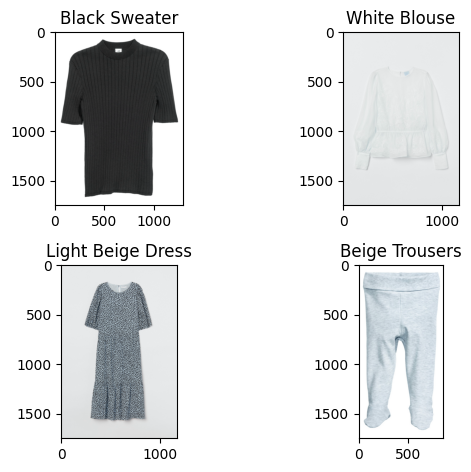

In [40]:
#YOU CAN RERUN THIS CELL MULTIPLE TIMES TO GENERATE MULTIPLE PREDICTIONS FOR DIFFERENT CLOTHING SETUPS
input_type  = [article_df.sample()['label'].values[0],article_df.sample()['label'].values[0]]
input_color = [color_df.sample()['label'].values[0],color_df.sample()['label'].values[0]]

#THIS IS WHERE INFERENCE IS ACTUALLY BEING RAN
type_rec, color_rec = do_inference(
    item_type=input_type,
    item_color=input_color,
    type_df=article_df,
    color_df=color_df,
    type_model=type_model,
    color_model=color_model)

print(f"Generating predictions for a user that likes {input_color[0]} {input_type[0]}, and {input_color[1]} {input_type[1]}")

f, axarr = plt.subplots(2,2)
for idx, color in enumerate(color_rec):
    print(f"Recommendation #{idx+1}: {color} {type_rec[idx]}")
    example_articles = articles.loc[articles['product_type_name']==type_rec[idx]]
    example_articles = example_articles.loc[example_articles['colour_group_name']==color]
    article_id = example_articles.sample()['article_id'].values[0]
    article_filename = f"data/images/{f'0{article_id}'[:3]}/{f'0{article_id}.jpg'}"
    try:
        image = cv2.imread(article_filename)
        x = floor(idx/2)
        y = idx%2
        axarr[x,y].imshow(image)
        axarr[x,y].title.set_text(f"{color} {type_rec[idx]}")
    except:
        print(f"Failed to open image: {article_filename}")
        pass
f.tight_layout(pad=1)
plt.show()

In [41]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(article_df)

,Unnamed: 0,label,code,oh
0,0,Unknown,-1,0
1,1,Sleeping sack,49,1
2,2,Swimsuit,57,2
3,3,Swimwear bottom,59,3
4,4,Swimwear top,60,4
5,5,Bag,66,5
6,6,Belt,67,6
7,7,Bracelet,68,7
8,8,Cap/peaked,69,8
9,9,Earring,70,9
